In [1]:
from haven import haven_jupyter as hj
from haven import haven_results as hr
from haven import haven_utils as hu
import pprint
import numpy as np
from experiments_config.syn_interp_exp import *
from experiments_config.kernelize_exp import *
from experiments_config.syn_vary_n_exp import *
from experiments_config.syn_cyclic_exp import *
from experiments_config.syn_check_alpha_beta import *
from experiments_config.syn_non_interp_exp import *
from experiments_config.line_search_exp import *
from exp_configs import get_exp_group
from copy import deepcopy

In [2]:
def form_exp_list(exp_groups, exp_config):
    exp_list = []
    for e in exp_groups:
        exp_list += get_exp_group(**exp_config)[e]
    return exp_list

In [68]:
# path to where the experiments are saved
base = './outputs/'

savedir_synthetic_non_interp = base + 'output_synthetic_non_interp'
savedir_synthetic_main_plot = base + 'output_synthetic_main_plot'

savedir_sls_mushrooms = base + 'output_sls_mushrooms'
savedir_sls_mushrooms_1 = base + 'output_sls_mushrooms_1'
savedir_sls_mushrooms_2 = base + 'output_sls_mushrooms_2'

savedir_sls_ijcnn = base + 'output_sls_ijcnn'
savedir_sls_ijcnn_1 = base + 'output_sls_ijcnn_1'
savedir_sls_ijcnn_2 = base + 'output_sls_ijcnn_2'

savedir_sls_rcv1 = base + 'output_sls_rcv1'

exp_config_fname = './exp_configs.py'

In [25]:
markersize = 15
markevery = 100
linewidth = 3
shb = 'solid'
sgd = 'dotted'
styles = {}

styles['SGD_CNST'] = {'label':'SGD',  'color':'black',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_CNST'] = {'label':'SHB',  'color':'blue',
                         'marker':'o', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MUL_0.4_False'] = {'label':'Multi-SHB',  'color':'green',
                         'marker':'*', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MUL_auto_False'] = {'label':'Multi-SHB-adaptive-increase',  'color':'darkcyan',
                         'marker':'v', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MUL_0.4_True'] = {'label':'Multi-SHB-CNST',  'color':'orange',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MUL_auto_True'] = {'label':'Multi-SHB-adaptive-constant',  'color':'brown',
                         'marker':'p', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SGD_ACC_EXP'] = {'label':'Nesterov-EXP',  'color':'purple',
                         'marker':'s', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

styles['SHB_MIX_0.5'] = {'label':'2P-SHB',  'color':'red',
                         'marker':'P', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

# -------------------------------------------------------------------------------------------

styles['SHB_CNST_1.0'] = {'label':'SHB-1.0',  'color':'darkcyan',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_1'] = {'label':'SHB-1.0',  'color':'darkcyan',
                         'marker':'d', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.9'] = {'label':'SHB-0.9',  'color':'m',
                         'marker':'v', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.8'] = {'label':'SHB-0.8',  'color':'red',
                         'marker':'s', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.7'] = {'label':'SHB-0.7',  'color':'brown',
                         'marker':'p', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.6'] = {'label':'SHB-0.6',  'color':'orange',
                         'marker':'8', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.5'] = {'label':'SHB-0.5',  'color':'mediumpurple',
                         'marker':'H', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.4'] = {'label':'SHB-0.4',  'color':'skyblue',
                         'marker':'X', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.3'] = {'label':'SHB-0.3',  'color':'green',
                         'marker':'x', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.25'] = {'label':'SHB-0.25',  'color':'cyan',
                         'marker':'>', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_CNST_0.12'] = {'label':'SHB-0.125',  'color':'pink',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

In [26]:
styles['SHB_MUL_0.5'] = {'label':'SHB-MUL-0.5',  'color':'pink',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_auto'] = {'label':'SHB-MUL',  'color':'slategray',
                         'marker':'^', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_PAN_2'] = {'label':'Multi-SHB-PAN-2',  'color':'mediumpurple',
                         'marker':'8', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SHB_MUL_PAN_max'] = {'label':'Multi-SHB-PAN-T-KAP',  'color':'navy',
                         'marker':'3', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

In [54]:
styles['SGD_SLS'] = {'label':'SLS',  'color':'red',
                         'marker':'h', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SGD_LOG_SLS'] = {'label':'LOG-SLS',  'color':'darkgreen',
                         'marker':'^', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SGD_0.1'] = {'label':'GD-0.1',  'color':'black',
                         'marker':'8', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SGD_0.001'] = {'label':'GD-0.001',  'color':'navy',
                         'marker':'3', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SGD_0.5'] = {'label':'GD-0.5',  'color':'gray',
                         'marker':'>', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }
styles['SGD_POLYAK'] = {'label':'POLYAK',  'color':'pink',
                         'marker':'H', 'markersize':markersize,
                           'linewidth': linewidth, 'linestyle':shb,
                     'markevery':markevery }

# ExpList for Losses

In [9]:
def get_res_dict(config, datasets, batch_size, kappa=None, variance=None, runs=[0,1,2]):
    exp_groups = []

    for dataset in datasets:
        exp_groups.append("exp_" + dataset)
    exp_list = form_exp_list(exp_groups, config)

    loss_exp_dict={}
    combined_filter_dict={}

    for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:

        rfilteres=[({"loss_func":loss_func})] 
        rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
        loss_exp_dict[loss_func]=rest_exp 


    for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
        filtered_best_exp_list=[]

        filtered_best_exp_list +=[        
                ({'opt':{'name':'EXP_SHB', 'alpha_t':'CNST', 'method':'WANG21', "is_sls":False},  
                    "loss_func":loss_func, 'kappa':kappa, 'variance': variance, 'batch_size':batch_size},
                   {'style':styles["SHB_CNST"]})]


        filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SGD', 'alpha_t':'CNST'},  
                "loss_func":loss_func, 'kappa':kappa, 'variance': variance, 'batch_size':batch_size},
               {'style':styles["SGD_CNST"]})]

        filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_ACC_SGD', 'alpha_t':'DECR', "is_sls":False},  
                "loss_func":loss_func, 'kappa':kappa, 'variance': variance, 'batch_size':batch_size},
               {'style':styles["SGD_ACC_EXP"]})]
        for run in runs:
            for c in [0.5]:
                filtered_best_exp_list +=[        
                ({'opt':{'name':'Mix_SHB', 'c':c},  
                    "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa, 'variance': variance, 'runs':run},
                   {'style':styles["SHB_MIX_0.5"]})]

#             for C in [2, 'max']:
#                 filtered_best_exp_list +=[        
#                     ({'opt':{'name':'M_SHB_PAN', 'C':C},  
#                         "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa, 'variance': variance, 'runs':run},
#                        {'style':styles[f"SHB_MUL_PAN_{C}"]})]
    #         for C in ['max']:
    #             filtered_best_exp_list +=[        
    #                 ({'opt':{'name':'M_SHB_PAN', 'C':C},  
    #                     "loss_func":loss_func, 'kappa':kappa, 'variance': variance},
    #                    {'style':styles[f"SHB_MUL_PAN_{C}"]})]
            for c in [0.4]:
                for beta in [False, True]:
                    filtered_best_exp_list +=[        
                        ({'opt':{'name':'M_ASHB', 'c':c, 'beta_const':beta},  
                            "loss_func":loss_func, 'batch_size':batch_size, 'kappa':kappa, 'variance': variance, 'runs':run},
                           {'style':styles[f"SHB_MUL_{c}_{beta}"]})]

        combined_filter_dict[loss_func]=filtered_best_exp_list 

    print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)))
    return loss_exp_dict, combined_filter_dict

In [71]:
EXP_LINE_SEARCH_CONFIGS={}
EXP_LINE_SEARCH_CONFIGS['max_epoch'] = 2000
EXP_LINE_SEARCH_CONFIGS['runs'] = [0,1,2]
EXP_LINE_SEARCH_CONFIGS['batch_size'] = [-1,-10/1]
EXP_LINE_SEARCH_CONFIGS['benchmarks_list'] = ["mushrooms","ijcnn"] #["mushrooms", "rcv1", "ijcnn"]
EXP_LINE_SEARCH_CONFIGS['losses'] = ["squared_loss", "logistic_loss"]
EXP_LINE_SEARCH_CONFIGS['is_kernelize'] = 0
opt_list = []

# grid search
for lr in [1e-1, 1e-3, 0.5]:
    opt_list += [{'name': 'EXP_SGD',
                        'alpha_t': 'CNST',
                        'lr': lr,
                        'is_sls': False,
                        'ada': None
                        }]

opt_list += [{'name': 'EXP_SGD',
                      'alpha_t': 'CNST',
                      'lr': 2,
                      'is_sls': 'sls',
                      'ada': None
                      }]

opt_list += [{'name': 'EXP_SGD',
                      'alpha_t': 'CNST',
                      'lr': 2,
                      'is_sls': 'log_sls',
                      'ada': None
                      }]

# opt_list += [{'name': 'EXP_SGD',
#                       'alpha_t': 'CNST',
#                       'lr': 2,
#                       'is_sls': 'polyak',
#                       'ada': None
#                       }]

EXP_LINE_SEARCH_CONFIGS['opt_list'] = opt_list

In [64]:
def get_res_dict_sls(config, datasets, batch_size, runs=[0,1,2]):
    exp_groups = []

    for dataset in datasets:
        exp_groups.append("exp_" + dataset)
    exp_list = form_exp_list(exp_groups, config)

    loss_exp_dict={}
    combined_filter_dict={}

    for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:

        rfilteres=[({"loss_func":loss_func})] 
        rest_exp=hr.filter_exp_list(exp_list, filterby_list=rfilteres, verbose=0)
        loss_exp_dict[loss_func]=rest_exp 


    for loss_func,loss in [("squared_loss","squared"),("logistic_loss","logistic")]:
        filtered_best_exp_list=[]
        
        for lr in [1e-1, 1e-3, 0.5]:
            filtered_best_exp_list +=[        
                    ({'opt':{'name':'EXP_SGD', 'alpha_t':'CNST', "is_sls":False, 'lr':lr},  
                        "loss_func":loss_func, 'batch_size':batch_size},
                       {'style':styles["SGD_"+str(lr)]})]


        filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SGD', 'alpha_t':'CNST', "is_sls":'sls'},  
                "loss_func":loss_func, 'batch_size':batch_size},
               {'style':styles["SGD_SLS"]})]

        filtered_best_exp_list +=[        
            ({'opt':{'name':'EXP_SGD', 'alpha_t':'CNST', "is_sls":'log_sls'},  
                "loss_func":loss_func, 'batch_size':batch_size},
               {'style':styles["SGD_LOG_SLS"]})]
        
#         filtered_best_exp_list +=[        
#             ({'opt':{'name':'EXP_SGD', 'alpha_t':'CNST', "is_sls":'polyak'},  
#                 "loss_func":loss_func, 'batch_size':batch_size},
#                {'style':styles["SGD_POLYAK"]})]


        combined_filter_dict[loss_func]=filtered_best_exp_list 

    print(len(hr.filter_exp_list(loss_exp_dict["squared_loss"], filterby_list=combined_filter_dict["squared_loss"], verbose=0)))
    return loss_exp_dict, combined_filter_dict

# Squared Loss

15
[{'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'lr': 0.1, 'is_sls': False, 'ada': None}, 'regularization_factor': 0, 'batch_size': -10.0, 'max_epoch': 2000, 'runs': 0, 'is_kernelize': 0}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'lr': 0.1, 'is_sls': False, 'ada': None}, 'regularization_factor': 0, 'batch_size': -10.0, 'max_epoch': 2000, 'runs': 1, 'is_kernelize': 0}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'lr': 0.1, 'is_sls': False, 'ada': None}, 'regularization_factor': 0, 'batch_size': -10.0, 'max_epoch': 2000, 'runs': 2, 'is_kernelize': 0}, {'dataset': 'mushrooms', 'loss_func': 'squared_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'lr': 0.001, 'is_sls': False, 'ada': None}, 'regularization_factor': 0, 'batch_size': -10.0, 'max_epoch': 2000, 'runs': 0, 'is_kernelize': 0}, {'dataset': 'mushrooms', 'loss

[<Figure size 1200x800 with 1 Axes>]

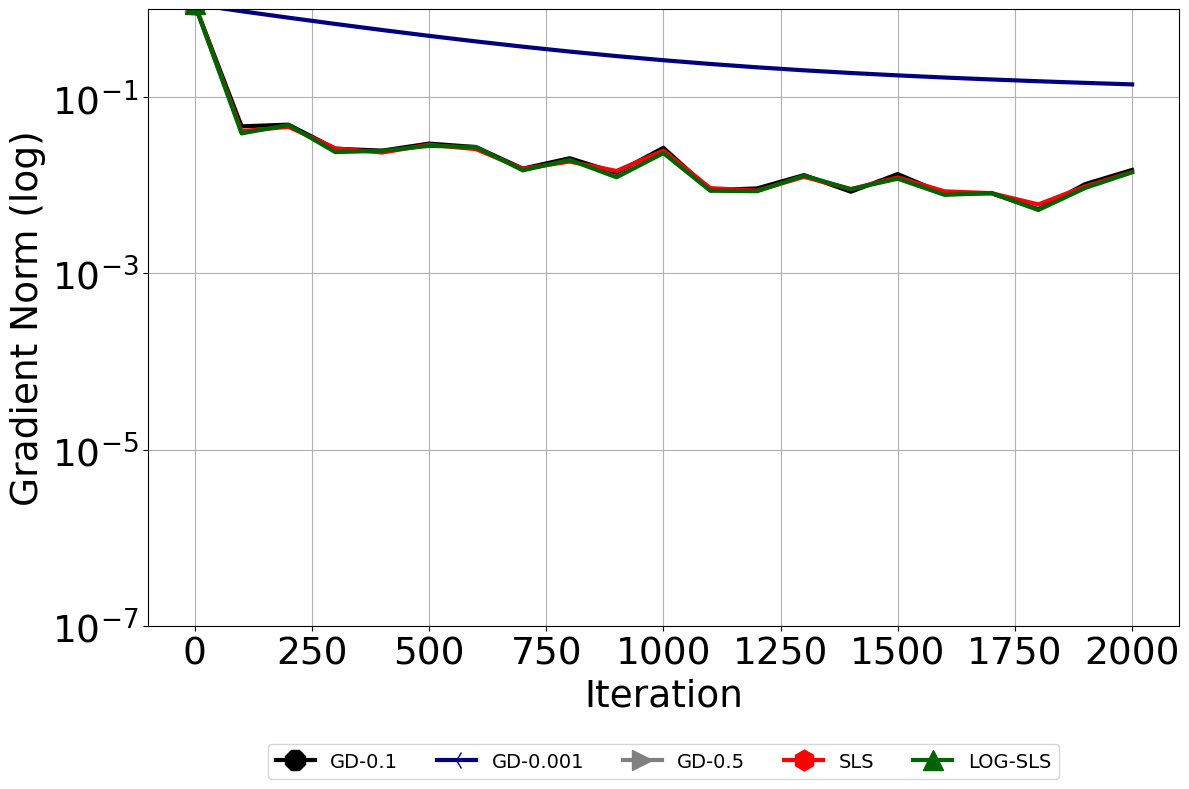

In [78]:
datasets = ["mushrooms"]
batch_size = -10/1
# kappa = 512
# variance = 1e-2
# runs = [0,1]
config = EXP_LINE_SEARCH_CONFIGS
# loss_exp_dict, combined_filter_dict = get_res_dict(config, datasets, batch_size, kappa, variance, runs)
loss_exp_dict, combined_filter_dict = get_res_dict_sls(config, datasets, batch_size)

show_legend_all=None
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["squared_loss"],
                    savedir_base=savedir_sls_mushrooms_2,
                    filterby_list=combined_filter_dict["squared_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
#     title_list = ['kappa','variance'], 
    groupby_list = ['dataset', 'model', 'n_samples', 'variance', 'kappa'],
    log_metric_list = ["grad_norm", 'alpha_k', 'train_loss'],
    legend_fontsize=14,
    x_fontsize=27,
    y_fontsize=27,
    xtick_fontsize=27,
    ytick_fontsize=27,
    title_fontsize=18,
    result_step=1,
    ylim_list=[[(10**(-7), 10**(0))]], 
    #[(10**(-13), 10**(5))],[(10**(-13), 10**(5))]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],(10**(0), 1e6)(-0.1, 1.1)(10**(-15), 10**(-4))
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'lambda_k': 'lambda_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': 'Iteration'}],
                figsize=(12,8),
    plot_confidence=False,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.22], 
                           'borderaxespad':0., 
                           'ncol':6,'loc':'center'},
    savedir_plots=f'./plots/squared_sls_mushrooms_2' 
            )

[{'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'lr': 0.1, 'is_sls': False, 'ada': None}, 'regularization_factor': 0, 'batch_size': -10.0, 'max_epoch': 2000, 'runs': 0, 'is_kernelize': 0}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'lr': 0.1, 'is_sls': False, 'ada': None}, 'regularization_factor': 0, 'batch_size': -10.0, 'max_epoch': 2000, 'runs': 1, 'is_kernelize': 0}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'lr': 0.1, 'is_sls': False, 'ada': None}, 'regularization_factor': 0, 'batch_size': -10.0, 'max_epoch': 2000, 'runs': 2, 'is_kernelize': 0}, {'dataset': 'mushrooms', 'loss_func': 'logistic_loss', 'opt': {'name': 'EXP_SGD', 'alpha_t': 'CNST', 'lr': 0.001, 'is_sls': False, 'ada': None}, 'regularization_factor': 0, 'batch_size': -10.0, 'max_epoch': 2000, 'runs': 0, 'is_kernelize': 0}, {'dataset': 'mushrooms', 'los

[<Figure size 1200x800 with 1 Axes>]

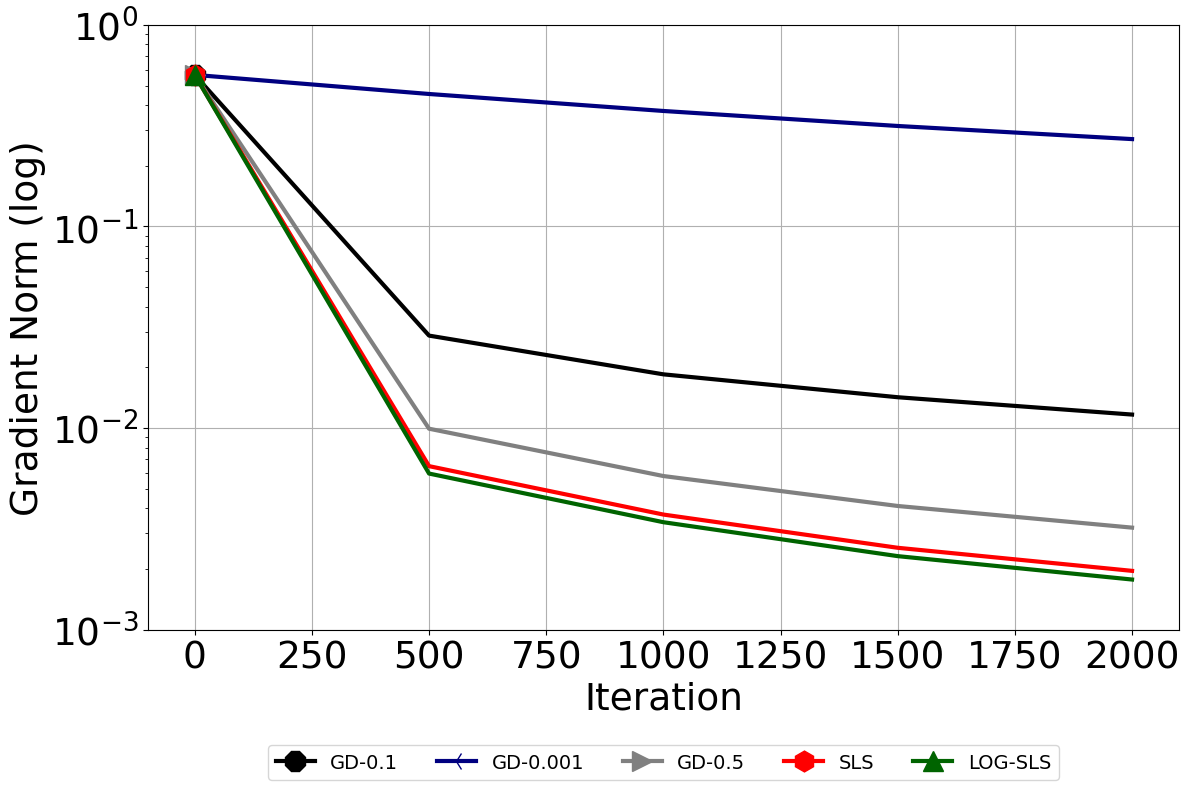

In [79]:
rm = hr.ResultManager(
                    exp_list= loss_exp_dict["logistic_loss"],
                    savedir_base=savedir_sls_mushrooms_2,
                    filterby_list=combined_filter_dict["logistic_loss"],
                    verbose= 0       
                     )
rm.get_plot_all(
    avg_across='runs',
    plot_median=True,
    order='metrics_by_groups',
    show_legend_all=show_legend_all,
    legend_last_row_only=True,
    y_metric_list =  ['grad_norm'], 
    x_metric='itr',
    legend_list=['opt.name'], 
#     title_list = ['kappa','variance'], 
    groupby_list = ['dataset', 'model', 'n_samples', 'variance', 'kappa'],
    log_metric_list = ["grad_norm", 'alpha_k', 'train_loss'],
    legend_fontsize=14,
    x_fontsize=27,
    y_fontsize=27,
    xtick_fontsize=27,
    ytick_fontsize=27,
    title_fontsize=18,
    result_step=5,
    ylim_list=[[(10**(-3), 10**(0))]], 
    #[(10**(-13), 10**(5))],[(10**(-13), 10**(5))]],# (10**(-3), 24), (10**(-3.1), 10**(-.8))]],(10**(0), 1e6)(-0.1, 1.1)(10**(-15), 10**(-4))
    
    map_ylabel_list=[{'train_loss':'Train loss'}, 
                     {'val_acc':'Validation accuracy'},
                     {'grad_norm': 'Gradient Norm'},
                     {'alpha_k': 'alpha_k'},
                     {'beta_k': 'beta_k'},
                     {'lambda_k': 'lambda_k'},
                     {'n_grad_evals': 'Number of stochastic gradient evaluations'}],
    map_xlabel_list=[{'itr': 'Iteration'}],
                figsize=(12,8),
    plot_confidence=False,
     legend_kwargs={'bbox_to_anchor':[0.5, -0.22], 
                           'borderaxespad':0., 
                           'ncol':6,'loc':'center'},
    savedir_plots=f'./plots/logistic_sls_mushrooms_2' 
            )